<div style="text-align: center;">
    <h2>Rapport du Data</h2>
</div>

# üßæ Sujet : Social Network Ads Dataset
This dataset simulates data collected from a social media advertising campaign. Each record represents a user with demographic features and whether they purchased a product after seeing an ad.

# üéØ Features:
User ID ‚Äì unique identifier (not useful for analysis)

Gender ‚Äì male or female

Age ‚Äì in years

EstimatedSalary ‚Äì approximate annual income

Purchased ‚Äì target variable (1 = purchased, 0 = not purchased)



# üéØ Objectif du Projet :
L‚Äôobjectif est de pr√©dire si un utilisateur ach√®tera un produit apr√®s avoir vu une publicit√© sur un r√©seau social, en utilisant ses informations personnelles (√¢ge, sexe, salaire).

Ce que nous allons faire :

1-D√©crire et nettoyer les donn√©es

2-Visualiser les relations entre les variables

3-Entra√Æner plusieurs mod√®les de classification

# ***Partie 1: Description***

# *Importer les biblioth√®ques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# *Load  data

In [2]:
df = pd.read_csv('ADDSA.csv')
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [3]:
df.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.shape

(400, 5)

In [6]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

# ***Partie 2: DATA Cleaning***

# *V√©rifier les valeurs manquantes

In [7]:
print(df.isnull().sum())  # Total des valeurs manquantes par colonne

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


# *V√©rifier et supprimer les doublons

In [8]:
# V√©rification des doublons
print("Nombre de doublons dans le dataset:", df.duplicated().sum())

Nombre de doublons dans le dataset: 0


# *V√©rifier les valeurs aberrantes

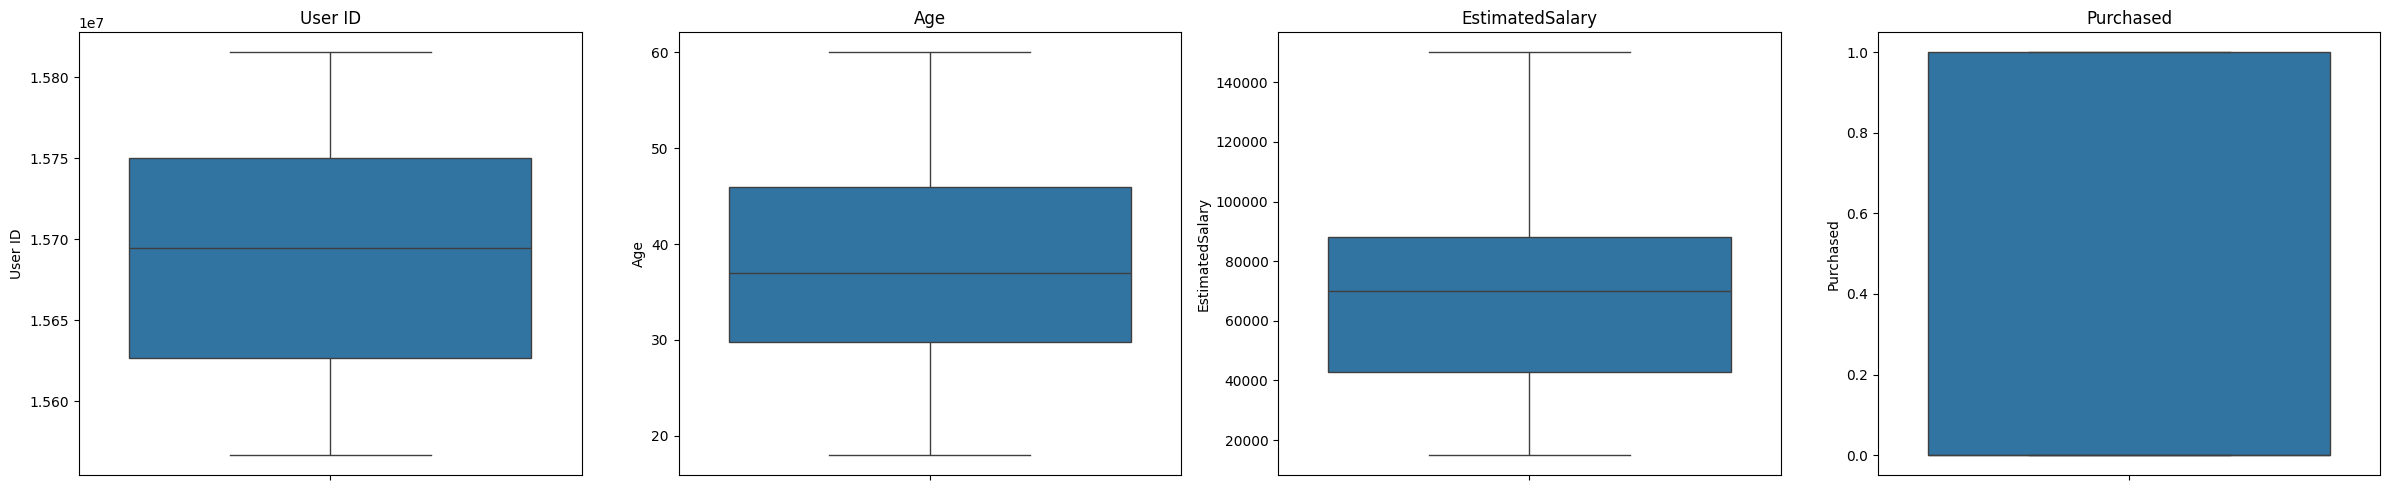

In [9]:
plt.figure(figsize=(30, 5))  # Ajuste la taille du graphique

for i, col in enumerate(df.select_dtypes(include='number').columns, 1,):
    plt.subplot(1, len(df.columns), i)  # Cr√©e des sous-graphiques c√¥te √† c√¥te
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()  # Ajuste les espacements=
plt.show()

# *Supprimer la colonne inutile User ID

In [10]:
df = df.drop(columns=['User ID'])  # Cette colonne n‚Äôapporte rien √† la pr√©diction


In [11]:
df.head()

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

# *Encoder la variable cat√©gorielle Gender

In [12]:
pd.get_dummies(df,columns=['Gender'])

Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0     19            19000          0          False         True
1     35            20000          0          False         True
2     26            43000          0           True        False
3     27            57000          0           True        False
4     19            76000          0          False         True
..   ...              ...        ...            ...          ...
395   46            41000          1           True        False
396   51            23000          1          False         True
397   50            20000          1           True        False
398   36            33000          0          False         True
399   49            36000          1           True        False

[400 rows x 5 columns]

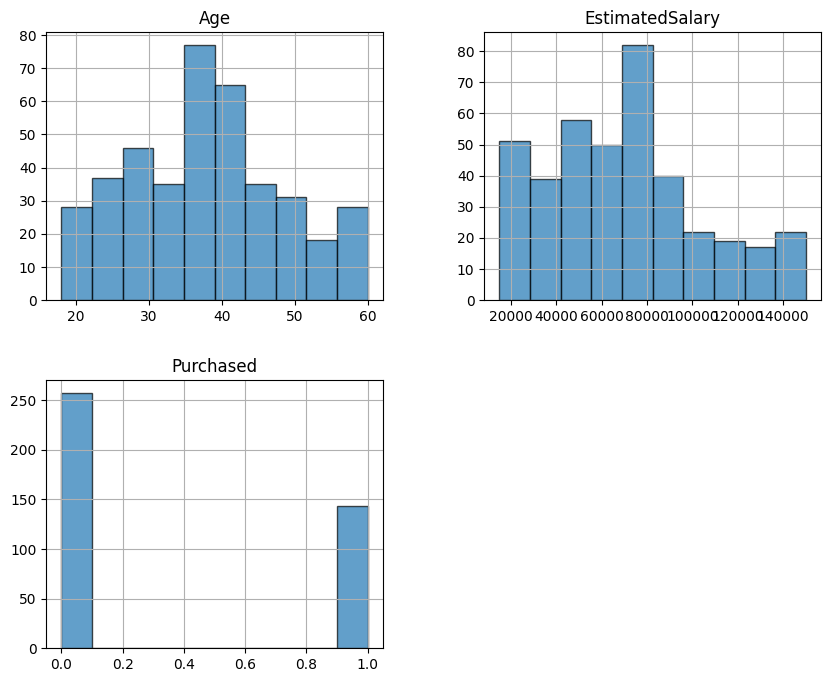

In [13]:
df.hist(edgecolor='black',alpha=0.7,figsize=(10,8))
plt.show()

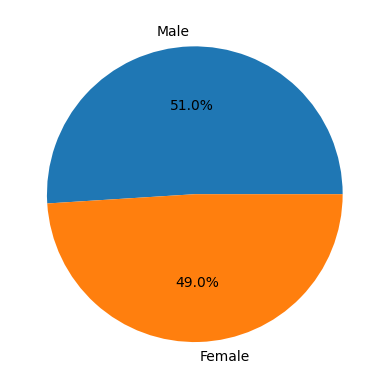

In [14]:
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].unique(),autopct='%1.1f%%')
plt.show()

# ***Partie 3: la pr√©paration des donn√©es*** 

# *√âtape 1: S√©lectionner les caract√©ristiques (features) et la variable cible (target)

In [15]:
# S√©lection des caract√©ristiques (features) et de la variable cible (target)

X = df[['Age', 'EstimatedSalary']] 
 
y = df['Purchased']  

# *√âtape 2: Normalisation des donn√©es (Standardisation)

In [16]:
from sklearn.preprocessing import StandardScaler

# Cr√©ation d'un objet StandardScaler
scaler = StandardScaler()

# Normalisation des caract√©ristiques
X_scaled = scaler.fit_transform(X)



In [17]:
# V√©rifier les valeurs normalis√©es
print("Exemple de donn√©es normalis√©es :")
print(X_scaled[:5])  # Afficher les 5 premi√®res lignes des donn√©es normalis√©es


Exemple de donn√©es normalis√©es :
[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]]


# *√âtape 3: S√©paration des donn√©es en ensembles d‚Äôentra√Ænement et de test

## ensemble d'entra√Ænement (pour entra√Æner le mod√®le)

## Ensemble de test (pour √©valuer la performance du mod√®le)

In [18]:

# S√©parer les donn√©es en ensembles d'entra√Ænement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Ensemble d'entra√Ænement X : {X_train.shape}")
print(f"Ensemble de test X : {X_test.shape}")


Ensemble d'entra√Ænement X : (280, 2)
Ensemble de test X : (120, 2)


 # ***üìà Mod√®le : R√©gression Logistique***

## ***1. Importer les biblioth√®ques n√©cessaires***

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


## ***2. Entra√Æner le mod√®le***

In [20]:
# Cr√©er un mod√®le de r√©gression logistique

log_model = LogisticRegression()

In [21]:
# Entra√Æner le mod√®le
log_model.fit(X_train, y_train)

LogisticRegression()

# ***3. Faire des pr√©dictions***

In [22]:
# Pr√©dictions sur l'ensemble de test

y_pred = log_model.predict(X_test)



## **Visualisation des r√©sultats**

In [83]:
from sklearn.metrics import accuracy_score

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f" Accuracy du mod√®le de r√©gression logistique : {accuracy:.2f}")


 Accuracy du mod√®le de r√©gression logistique : 0.44


## mod√®le de r√©gression logistique a obtenu une accuracy de 0.85, ce qui signifie qu‚Äôil a correctement pr√©dit 85% des cas sur l‚Äôensemble de test.

# ***4. √âvaluer le mod√®le***

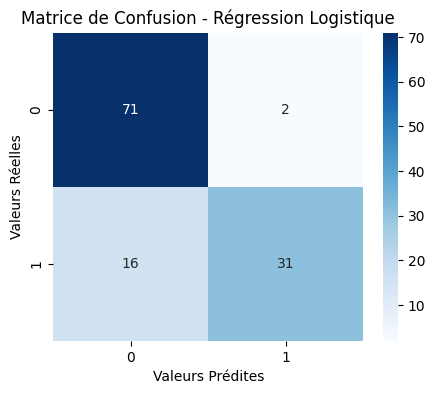

In [24]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage graphique
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Valeurs Pr√©dites")
plt.ylabel("Valeurs R√©elles")
plt.title("Matrice de Confusion - R√©gression Logistique")
plt.show()

In [25]:
# 
accuracy = accuracy_score(y_test, y_pred)
print(f"Pr√©cision du mod√®le : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Pr√©cision du mod√®le : 0.85

Rapport de classification :
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120



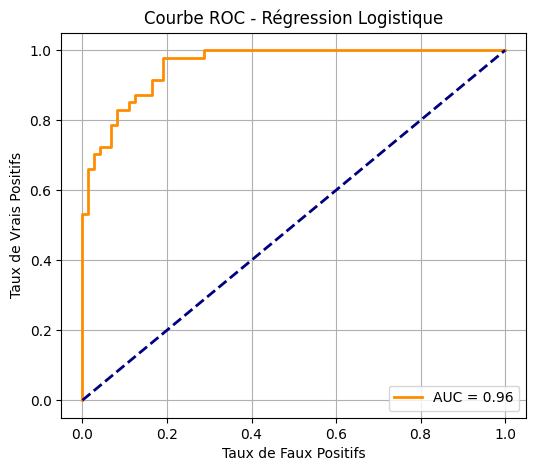

In [26]:
# Calcul de la courbe ROC

# Probabilit√©s (pour courbe ROC)

y_proba = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - R√©gression Logistique')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Validation**

In [27]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# S√©lection des caract√©ristiques (features) et de la variable cible (target)

X = df[['Age', 'EstimatedSalary']] 
 
y = df['Purchased'] 

In [29]:
# S√©parer les donn√©es en ensembles d'entra√Ænement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [30]:
# Cr√©er le mod√®le
knn_model = KNeighborsClassifier(n_neighbors=5)

In [31]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

scores=cross_val_score(knn_model,X,y,cv=kf)

print(f"Scores de validation crois√©e : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation crois√©e : [0.825  0.8    0.7875 0.8125 0.775 ]
Score moyen : 0.80


### KFold(n_splits=5) divise ton dataset en 5 parties.

### cross_val_score(...) entra√Æne et teste le mod√®le 5 fois.

### scores contient les r√©sultats de chaque fold.

### scores.mean() te donne la performance globale moyenne.



## Scores de validation crois√©e : [0.825  0.8    0.7875 0.8125 0.775 ]
## Score moyen : 0.80

# **üî∑ Mod√®le : K-Nearest Neighbors (KNN)**

## ***1. Importer et entra√Æner le mod√®le KNN***



In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Cr√©er le mod√®le avec k=5 (valeur par d√©faut raisonnable)
knn_model = KNeighborsClassifier(n_neighbors=5)


In [33]:
# Entra√Æner le mod√®le
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## ***2. Pr√©dictions***

In [34]:
# Pr√©dictions
y_pred_knn = knn_model.predict(X_test)

# Probabilit√©s pour la courbe ROC
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

## ***3. Accuracy***

In [82]:
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f" Accuracy du mod√®le KNN : {accuracy_knn:.2f}")


 Accuracy du mod√®le KNN : 0.82


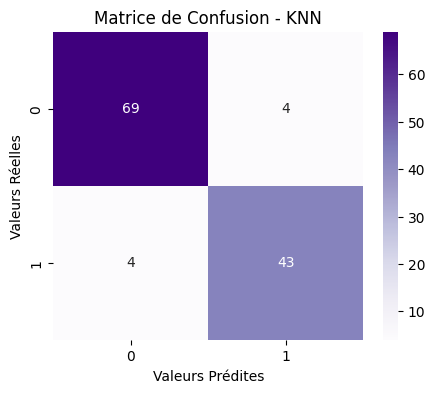

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples')
plt.title("Matrice de Confusion - KNN")
plt.xlabel("Valeurs Pr√©dites")
plt.ylabel("Valeurs R√©elles")
plt.show()


In [37]:
# Rapport de classification
print("üîç Rapport de Classification - KNN :")
print(classification_report(y_test, y_pred_knn))


üîç Rapport de Classification - KNN :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.91      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



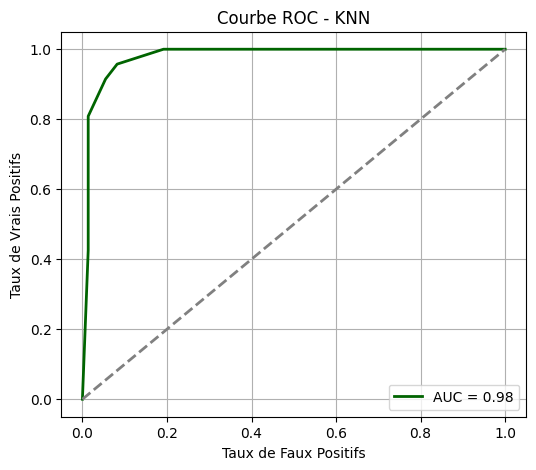

In [38]:
from sklearn.metrics import roc_curve, auc

# Courbe ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6,5))
plt.plot(fpr_knn, tpr_knn, color='darkgreen', lw=2, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title("Courbe ROC - KNN")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **üå≥Modele: DecisionTreeClassifier**

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 1. Diviser les donn√©es en ensembles d'entra√Ænement et de test

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Cr√©er le mod√®le DecisionTree

In [41]:
tree_model = DecisionTreeClassifier(random_state=42)


## 3. Entra√Æner le mod√®le

In [42]:

tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## 4. Pr√©dictions sur l'ensemble de test

In [43]:

y_pred = tree_model.predict(X_test)

## 5. Calculer et afficher l'accuracy

In [44]:

accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy du mod√®le Decision Tree : {accuracy:.2f}")

 Accuracy du mod√®le Decision Tree : 0.84


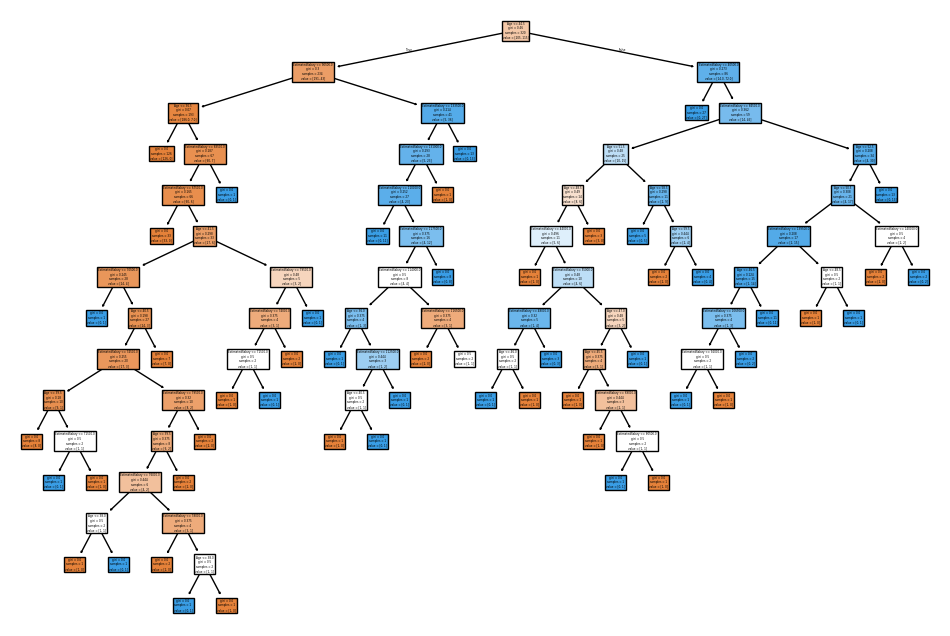

In [45]:
#Visualisation de l‚Äôarbre de d√©cision
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Afficher l'arbre de d√©cision
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X_train.columns)
plt.show()



# 6. Rapport de classification

In [46]:
# √âvaluation du mod√®le
accuracy = accuracy_score(y_test, y_pred)
print(f"Pr√©cision du mod√®le : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Pr√©cision du mod√®le : 0.84

Rapport de classification :
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



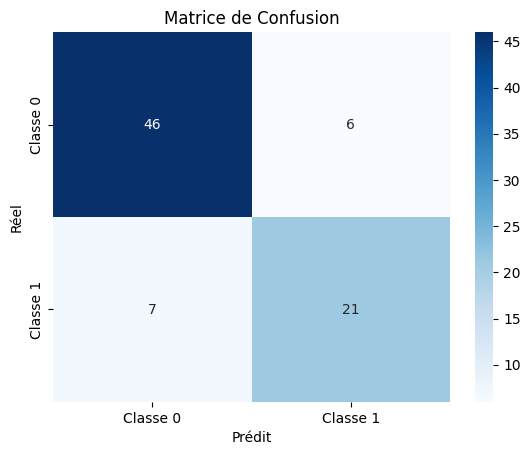

In [47]:

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Pr√©dit')
plt.ylabel('R√©el')
plt.title('Matrice de Confusion')
plt.show()

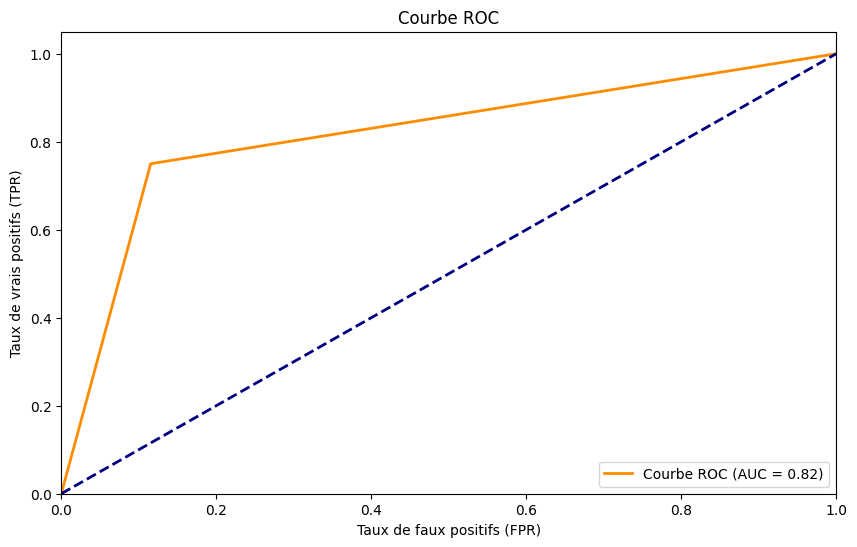

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Calcul des probabilit√©s de pr√©diction pour la classe positive
y_scores = tree_model.predict_proba(X_test)[:, 1]  # Utiliser tree_model au lieu de dt

# 2. Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)

# 3. Calcul de l'aire sous la courbe (AUC)
roc_auc = auc(fpr, tpr)

# 4. Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


 # **üå≥Mdele:Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [50]:
# 1. Cr√©ation du mod√®le RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

## Le mod√®le RandomForestClassifier est initialis√© avec 100 arbres (n_estimators=100) et une graine fixe pour la reproductibilit√© (random_state=42).

In [51]:
# 2. Division des donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# 3. Entra√Æner le mod√®le
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# 4. Pr√©dictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

In [54]:
# 5. Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy du mod√®le Random Forest : {accuracy:.2f}")


 Accuracy du mod√®le Random Forest : 0.90


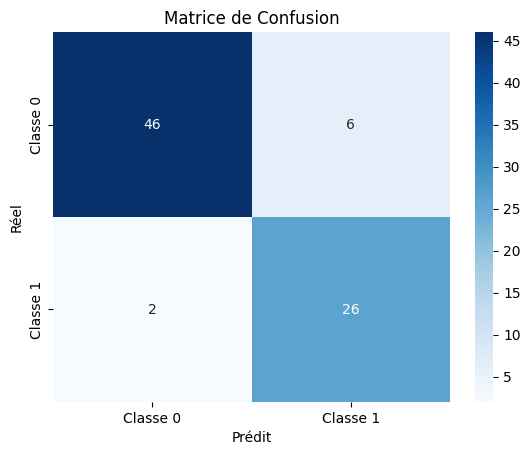

In [55]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Pr√©dit')
plt.ylabel('R√©el')
plt.title('Matrice de Confusion')
plt.show()

In [56]:
# √âvaluation du mod√®le
accuracy = accuracy_score(y_test, y_pred)
print(f"Pr√©cision du mod√®le : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Pr√©cision du mod√®le : 0.90

Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



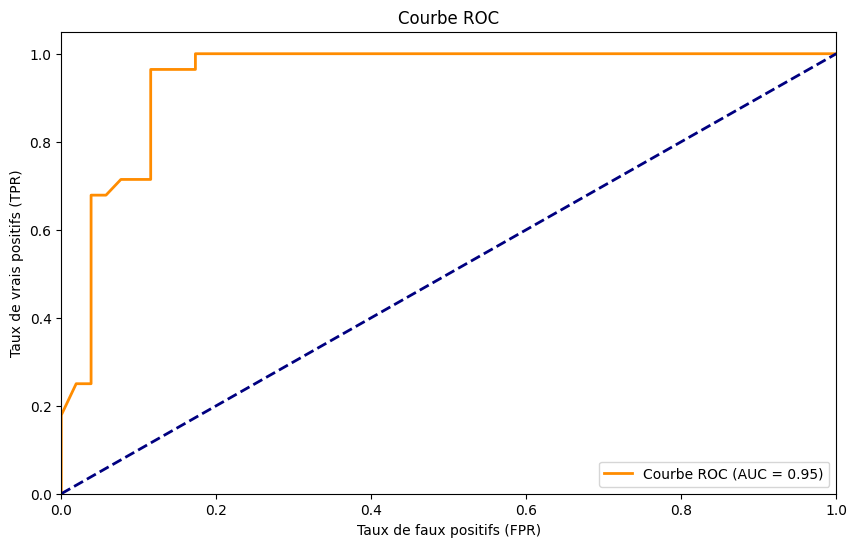

In [57]:
 # Calcul de la courbe ROC
y_scores = rf_model.predict_proba(X_test)[:, 1]  # Probabilit√©s de la classe positive
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 9. Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Pr√©dictions et √©valuation :

Accuracy : La proportion de pr√©dictions correctes sur l'ensemble de test.

Rapport de classification : Le rapport d√©taill√© comprenant la pr√©cision, le rappel, et le F1-score.

Matrice de confusion : Pour voir la r√©partition des classes pr√©dites contre les classes r√©elles.



In [58]:
#Validation crois√©e (KFold)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=kf)
print(f"\n Scores de validation crois√©e (Random Forest) : {scores}")
print(f" Score moyen : {scores.mean():.2f}")


 Scores de validation crois√©e (Random Forest) : [0.9125 0.9    0.9    0.875  0.8625]
 Score moyen : 0.89


### Validation crois√©e :

### On effectue une validation crois√©e avec KFold pour avoir une estimation plus fiable de la performance du mod√®le sur 5 divisions du dataset.

### ***Scores de validation crois√©e (Random Forest) : [0.9125 0.9    0.9    0.875  0.8625]***
 ### ***Score moyen : 0.89***

# **‚úÖ mod√®le :SVC (Support Vector Classifier)**

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [60]:
# 1. S√©lectionner un petit √©chantillon (par exemple 200 lignes)
X_small = X_train.sample(200, random_state=42)
y_small = y_train.loc[X_small.index]

In [61]:
# 2. Cr√©er le mod√®le SVC avec noyau lin√©aire et probabilit√© activ√©e
svc_model = SVC(kernel='linear', random_state=42)

## Cr√©ation du mod√®le SVM avec noyau lin√©aire

In [62]:
# 3. Entra√Æner le mod√®le sur le petit √©chantillon
svc_model.fit(X_small, y_small)

SVC(kernel='linear', random_state=42)

In [63]:
# 4. Pr√©dictions
y_pred = svc_model.predict(X_test)


In [64]:
# 5. √âvaluation
accuracy = accuracy_score(y_test, y_pred)
print(f" Pr√©cision du mod√®le SVC : {accuracy:.2f}")

 Pr√©cision du mod√®le SVC : 0.80


In [65]:
print("\nüîç Rapport de classification :\n", classification_report(y_test, y_pred))



üîç Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        52
           1       0.77      0.61      0.68        28

    accuracy                           0.80        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.80      0.80      0.79        80



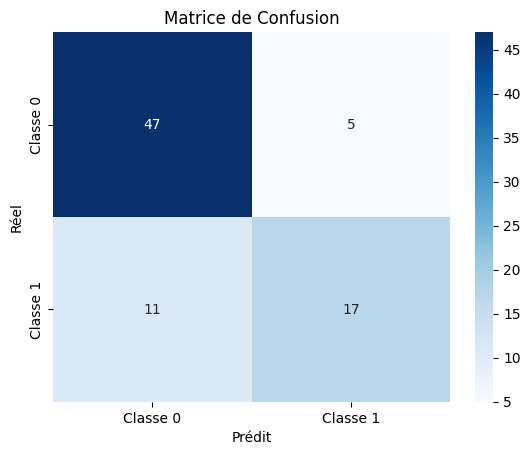

In [66]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Pr√©dit')
plt.ylabel('R√©el')
plt.title('Matrice de Confusion')
plt.show()

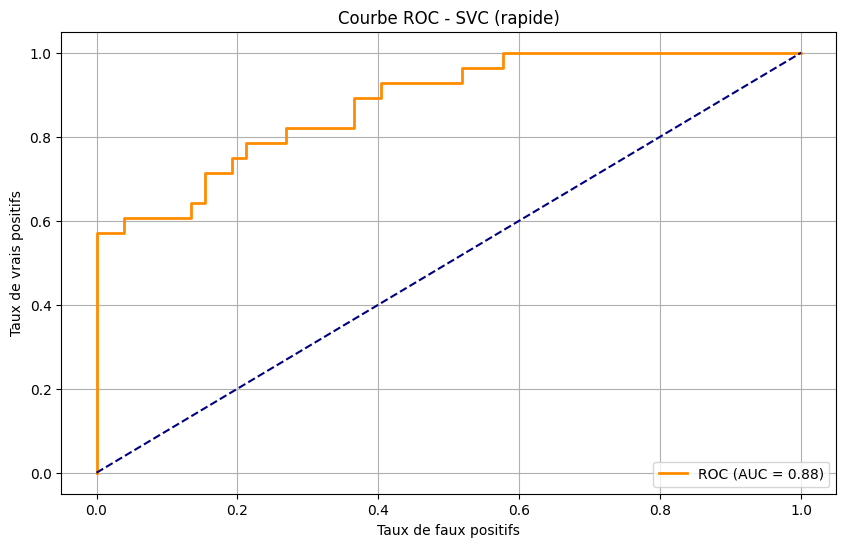

In [67]:
# 6. Courbe ROC avec decision_function au lieu de predict_proba
y_scores = svc_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 7. Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Courbe ROC - SVC (rapide)")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend(loc="lower right")
plt.grid()
plt.show()

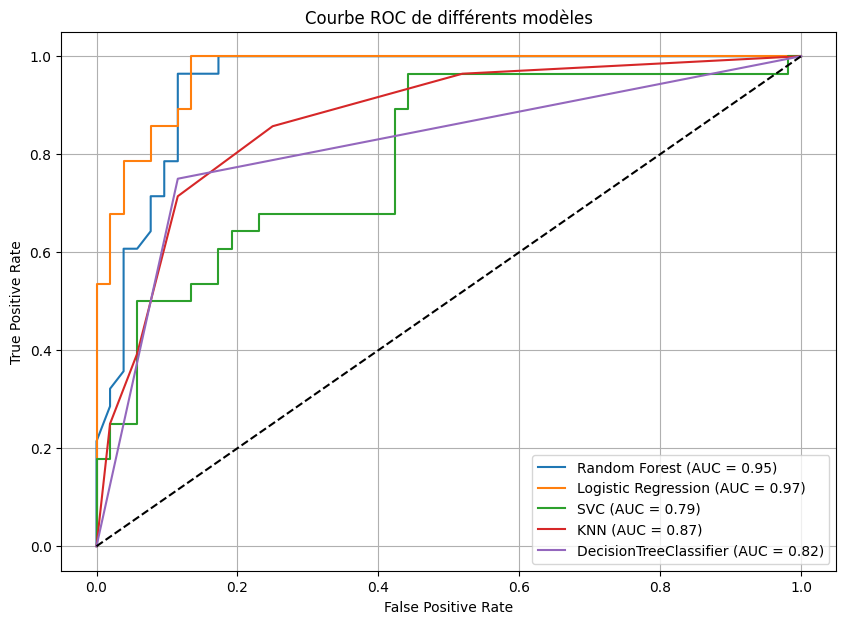

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "SVC": SVC(probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
    #"Gradient Boosting": GradientBoostingClassifier()
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Tracer la ligne de r√©f√©rence
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC de diff√©rents mod√®les')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Prendre une sous-partie des donn√©es pour entra√Æner plus vite
X_sample = X_train.sample(frac=0.3, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Dictionnaire des mod√®les
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50),
    "SVC": SVC(kernel='linear', max_iter=1000)
}

# Entra√Ænement + Pr√©cision
for name, model in models.items():
    model.fit(X_sample, y_sample)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} :: Accuracy : {acc:.2f}")


Logistic Regression :: Accuracy : 0.84
KNN :: Accuracy : 0.75
Decision Tree :: Accuracy : 0.86
Random Forest :: Accuracy : 0.90
SVC :: Accuracy : 0.44


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 Logistic Regression Accuracy : 0.89


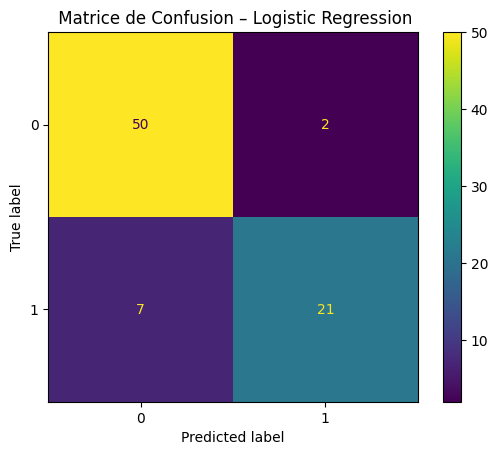

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print(f" Logistic Regression Accuracy : {acc_lr:.2f}")

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title(" Matrice de Confusion ‚Äì Logistic Regression")
plt.show()

 KNN Accuracy : 0.82


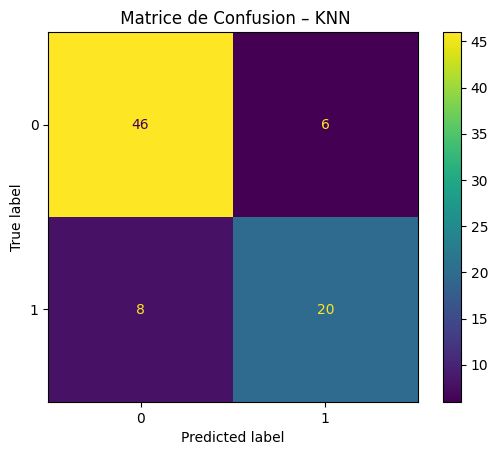

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f" KNN Accuracy : {acc_knn:.2f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title(" Matrice de Confusion ‚Äì KNN")
plt.show()

 Decision Tree Accuracy : 0.84


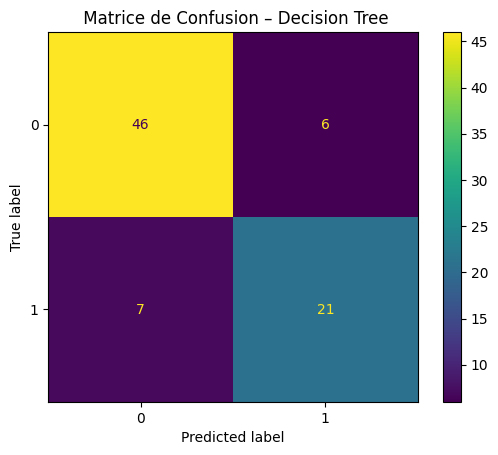

In [77]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f" Decision Tree Accuracy : {acc_dt:.2f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title(" Matrice de Confusion ‚Äì Decision Tree")
plt.show()

 Random Forest Accuracy : 0.90


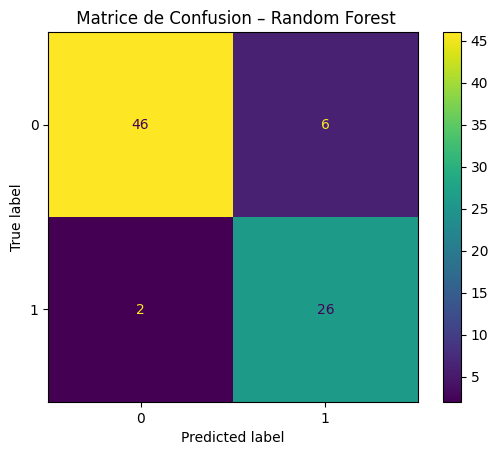

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f" Random Forest Accuracy : {acc_rf:.2f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title(" Matrice de Confusion ‚Äì Random Forest")
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Accuracy : 0.85


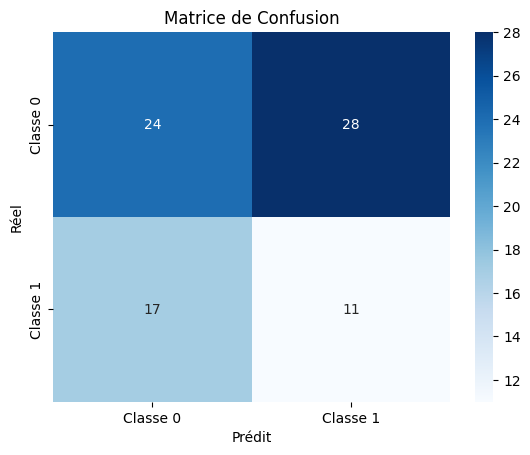

In [81]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', max_iter=1000)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

acc_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy : {acc_svc:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Pr√©dit')
plt.ylabel('R√©el')
plt.title('Matrice de Confusion')
plt.show()

# **enregistrer le meilleur mod√®le**

In [84]:
import joblib

In [85]:
joblib.dump(rf, 'best_model_random_forest.pkl')

['best_model_random_forest.pkl']


# Le mod√®le Random Forest est le plus performant pour ce dataset.

# Il peut √™tre int√©gr√© facilement dans une application Web pour pr√©dire l‚Äôachat d‚Äôun produit selon les caract√©ristiques d‚Äôun utilisateur.

